# 준비

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서도 아래 설치 문구의 주석을 제거하고 설치하고 import 해주기만 하면 한글폰트가 잘 나옵니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

# df = pd.read_csv("boostcourse-ds-510/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

# 📌 Q1. 연령대별 허리둘레에 대한 기술통계를 구하려고 합니다. 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!

In [3]:
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [4]:
agedf = df['연령대코드(5세단위)'].apply(lambda x:age_code[x])

In [5]:
df['연령대코드(5세단위)']=agedf

In [6]:
df = df.rename(columns={'연령대코드(5세단위)':'연령대'})

In [7]:
df.pivot_table(index='연령대')

,(혈청지오티)ALT,(혈청지오티)AST,HDL콜레스테롤,LDL콜레스테롤,가입자일련번호,감마지티피,구강검진 수검여부,기준년도,데이터공개일자,성별코드,...,청력(우),청력(좌),체중(5Kg 단위),총콜레스테롤,치석,트리글리세라이드,허리둘레,혈색소,혈청크레아티닌,흡연상태
연령대,,,,,,,,,,,,,,,,,,,,,
20~24세,20.143201,21.898813,62.349316,95.403228,500104.232552,21.519352,0.505741,2017,20181126,1.569254,...,1.003269,1.002839,61.525610,174.719059,0.543746,86.205685,75.152220,14.228547,0.821408,1.547507
25~29세,23.533816,23.010407,61.486814,102.207373,501625.236091,27.284843,0.530912,2017,20181126,1.460790,...,1.002694,1.002833,64.350581,183.660052,0.563111,102.617268,77.704783,14.498545,0.846309,1.586904
30~34세,27.807368,24.621483,58.350562,109.913720,501140.887375,34.780827,0.521071,2017,20181126,1.371931,...,1.003155,1.003529,67.667564,192.493620,0.609281,127.609057,81.089268,14.656205,0.870599,1.696327
35~39세,29.021892,25.203172,56.307863,113.540876,499614.010107,40.113360,0.491138,2017,20181126,1.317613,...,1.004570,1.004901,68.792387,196.645081,0.630557,142.551029,82.094012,14.695731,0.878004,1.827661
40~44세,26.414145,25.079577,57.522692,114.981678,499220.264093,39.223035,0.418213,2017,20181126,1.462098,...,1.007295,1.007517,65.301819,198.632590,0.648173,137.495578,80.488308,14.260532,0.852268,1.727634
45~49세,25.914941,25.460542,57.199020,116.635426,499456.764810,40.292029,0.406934,2017,20181126,1.460243,...,1.010773,1.011153,64.566527,200.850370,0.635027,141.338698,80.822449,14.222013,0.858272,1.692799
50~54세,26.620500,26.920106,57.171440,119.346377,498682.308066,40.729759,0.379564,2017,20181126,1.498363,...,1.018779,1.019364,62.900980,203.451639,0.628069,140.184117,81.062754,14.252258,0.852938,1.612845
55~59세,26.604839,27.722189,56.227007,117.899220,501055.596802,40.480129,0.367204,2017,20181126,1.493756,...,1.030599,1.030929,62.023107,200.945541,0.604700,138.019523,81.799905,14.242951,0.855507,1.568097
60~64세,26.012066,27.990366,55.613125,114.314316,500678.468232,38.459860,0.333311,2017,20181126,1.514069,...,1.043201,1.046064,61.220597,196.251779,0.578254,134.148974,82.722769,14.105222,0.861938,1.509869


In [8]:
df.pivot_table(index='연령대', values='허리둘레', aggfunc=['count','describe'])

count describe                                                \
          허리둘레      25%   50%   75%     count    max       mean   min   
연령대                                                                     
20~24세   23244     67.5  73.4  81.0   23244.0  999.0  75.152220  47.5   
25~29세   64898     69.0  76.5  84.2   64898.0  999.0  77.704783  48.0   
30~34세   77517     72.0  80.1  88.0   77517.0  999.0  81.089268  49.0   
35~39세   84621     75.0  82.0  89.0   84621.0  999.0  82.094012   9.2   
40~44세  130912     73.0  80.0  87.0  130912.0  999.0  80.488308  42.1   
45~49세  118357     74.0  81.0  87.0  118357.0  137.0  80.822449  40.0   
50~54세  129833     75.0  81.0  87.0  129833.0  142.0  81.062754   6.5   
55~59세  112175     76.0  82.0  87.5  112175.0  139.0  81.799905  32.0   
60~64세  106491     77.0  83.0  88.0  106491.0  137.0  82.722769   0.0   
65~69세   53624     78.0  83.5  89.0   53624.0  129.0  83.588500  50.0   
70~74세   51586     78.0  84.0  90.0   51586.0  129.8  84.063372  51.0   
75~79세   25972     78.0  84.0  90.0   25972.0  122.0  84.200127  50.0   
80~84세   16205     78.0  84.0  90.0   16205.0  120.0  83.751435  38.0   
85세+      4125     75.0  81.5  88.0    4125.0  999.0  81.736703  34.0   

                   
              std  
연령대                
20~24세  12.251781  
25~29세  16.735734  
30~34세  22.988111  
35~39세  14.522095  
40~44세  10.803098  
45~49세   9.521622  
50~54세   9.095438  
55~59세   8.730398  
60~64세   8.596176  
65~69세   8.443542  
70~74세   8.539639  
75~79세   8.772306  
80~84세   9.041091  
85세+    17.325969

# 📌 Q2. "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화 해주세요.

In [11]:
columns=['음주여부', '흡연상태', '연령대', '성별코드']

In [12]:
df_small = df[columns]
df_corr = df_small.corr()
df_corr

,음주여부,흡연상태,성별코드
음주여부,1.000000,0.352014,-0.368630
흡연상태,0.352014,1.000000,-0.588491
성별코드,-0.368630,-0.588491,1.000000


In [13]:
import matplotlib.pyplot as plt

<AxesSubplot:>

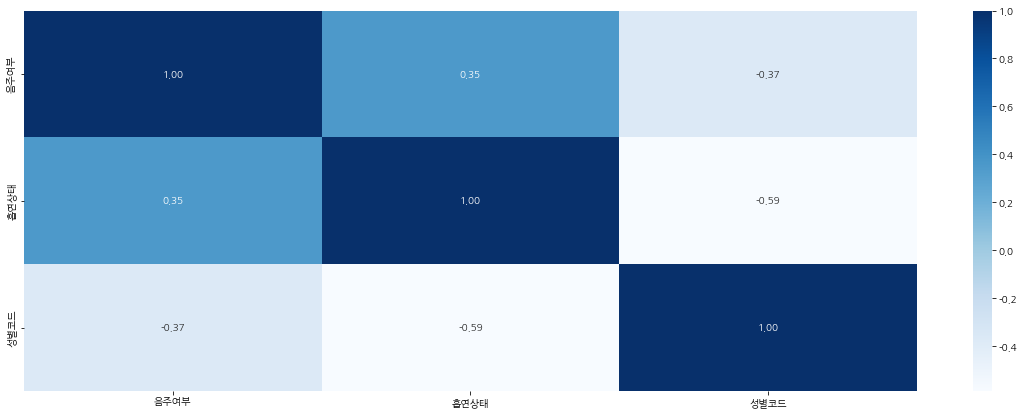

In [14]:
plt.figure(figsize=(20,7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap='Blues')

# 📌 Q3. 흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?
건강보험에서 제공하고 있는 데이터는 용량을 줄이기 위해 대부분의 데이터를 숫자 형태로 제공하고 있습니다. replace 기능을 사용하면 딕셔너리의 값을 의미하는 문자 형태로 변경해 볼 수 있습니다. 다음 제공되는 딕셔너리 값을 사용하여 숫자가 의미하는 문자 형태로 변경한 뒤 전체 데이터에서 음주와 흡연에 대한 교차 테이블을 구해 각 해당 빈도수를 구하고 시각화 해주세요!

In [15]:
# 흡연 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
# 음주 0(마시지 않은다), 1(마신다)
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

# df["흡연"]
# df["음주"]

In [16]:
df = df.replace({'흡연상태':smoke,'음주여부':drink})
# df.replace({'음주여부':drink})

In [17]:
df = df.rename(columns={'흡연상태':'흡연','음주여부':'음주'})
# df = df.rename(columns={'연령대코드(5세단위)':'연령대'})

In [18]:
pd.pivot_table(df, index=['흡연', '음주'], values='가입자일련번호', aggfunc='count')

가입자일련번호
흡연   음주          
끊음   마심    120779
     안마심    55334
흡연안함 마심    213743
     안마심   394503
흡연중  마심    162166
     안마심    52845

<AxesSubplot:xlabel='흡연', ylabel='count'>

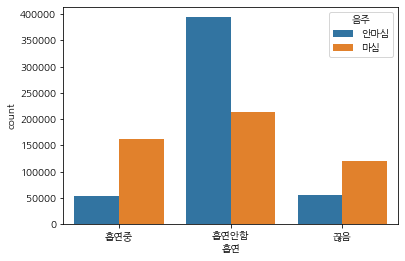

In [19]:
sns.countplot(data=df,x='흡연', hue='음주')

# 📌 Q4. 체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!

In [20]:
df120 = df[df['체중(5Kg 단위)']>=120]

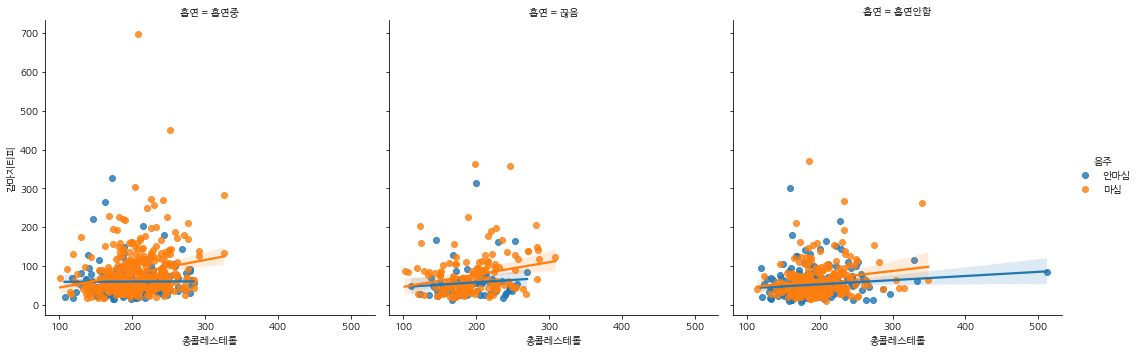

In [21]:
df120

sns.lmplot(data=df120, x='총콜레스테롤', y='감마지티피', hue='음주', col='흡연')

# 📌 Q5. 연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화 해주세요!

In [23]:
df=df[df['시력(좌)']!=9.9]

In [24]:
# 자꾸 에러가 나서 데이터를 하나 복사해서 썼습니다
df2 = df

In [25]:
df2=df2[df2['시력(좌)']!=9.9]
df2=df2[df2['시력(우)']!=9.9]

In [26]:
df2 = df2.sort_values(by='연령대')

<AxesSubplot:xlabel='시력(좌)', ylabel='연령대'>

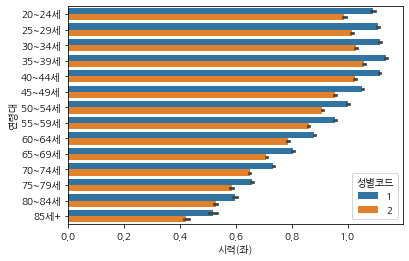

In [27]:
sns.barplot(data=df2, x='시력(좌)', y='연령대', hue='성별코드')

<AxesSubplot:xlabel='시력(우)', ylabel='연령대'>

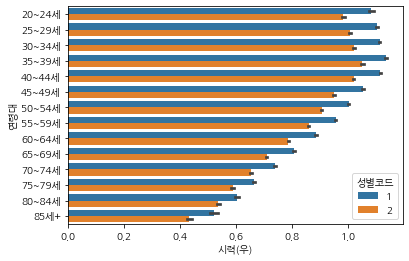

In [28]:
sns.barplot(data=df2, x='시력(우)', y='연령대', hue='성별코드')